<a href="https://colab.research.google.com/github/00kang/gis_deep_learning/blob/main/July/07_08_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **단순 신경망**

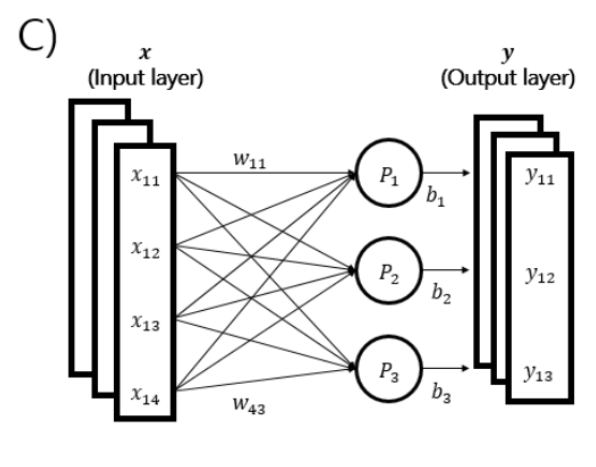

**신경망 구현 프로세스**

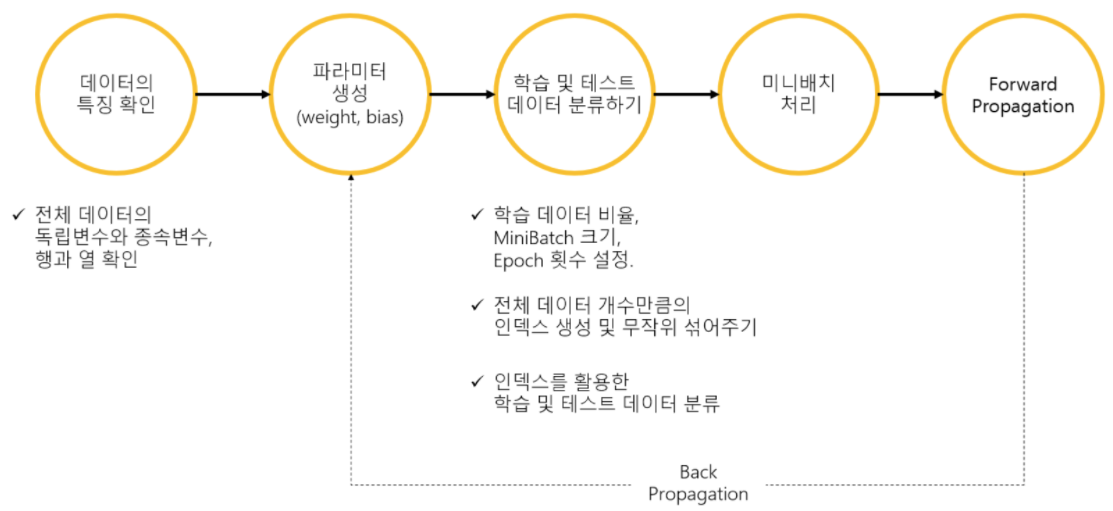

# **Faults_mini.csv**

**데이터 불러오기**

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/faults_mini.csv')

**데이터 확인**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   X_Minimum              10 non-null     int64
 1   Y_Minimum              10 non-null     int64
 2   Pixels_Areas           10 non-null     int64
 3   Steel_Plate_Thickness  10 non-null     int64
 4   Pastry                 10 non-null     int64
 5   Z_Scratch              10 non-null     int64
 6   K_Scatch               10 non-null     int64
dtypes: int64(7)
memory usage: 688.0 bytes


In [4]:
display(df)

,X_Minimum,Y_Minimum,Pixels_Areas,Steel_Plate_Thickness,Pastry,Z_Scratch,K_Scatch
0,42,270900,267,80,1,0,0
1,1084,185575,108,40,0,0,1
2,1109,1170194,130,175,0,1,0
3,190,210936,132,150,1,0,0
4,330,429227,264,150,1,0,0
5,74,779144,1506,150,1,0,0
6,51,585861,139,70,0,1,0
7,397,604478,444,70,0,1,0
8,43,366881,4048,40,0,0,1
9,48,377537,3985,40,0,0,1


**데이터 형식 변환**

In [5]:
data = np.asarray(df, dtype='float32')

In [10]:
print(type(data))
print(data)
print(data.shape)

<class 'numpy.ndarray'>
[[4.200000e+01 2.709000e+05 2.670000e+02 8.000000e+01 1.000000e+00
  0.000000e+00 0.000000e+00]
 [1.084000e+03 1.855750e+05 1.080000e+02 4.000000e+01 0.000000e+00
  0.000000e+00 1.000000e+00]
 [1.109000e+03 1.170194e+06 1.300000e+02 1.750000e+02 0.000000e+00
  1.000000e+00 0.000000e+00]
 [1.900000e+02 2.109360e+05 1.320000e+02 1.500000e+02 1.000000e+00
  0.000000e+00 0.000000e+00]
 [3.300000e+02 4.292270e+05 2.640000e+02 1.500000e+02 1.000000e+00
  0.000000e+00 0.000000e+00]
 [7.400000e+01 7.791440e+05 1.506000e+03 1.500000e+02 1.000000e+00
  0.000000e+00 0.000000e+00]
 [5.100000e+01 5.858610e+05 1.390000e+02 7.000000e+01 0.000000e+00
  1.000000e+00 0.000000e+00]
 [3.970000e+02 6.044780e+05 4.440000e+02 7.000000e+01 0.000000e+00
  1.000000e+00 0.000000e+00]
 [4.300000e+01 3.668810e+05 4.048000e+03 4.000000e+01 0.000000e+00
  0.000000e+00 1.000000e+00]
 [4.800000e+01 3.775370e+05 3.985000e+03 4.000000e+01 0.000000e+00
  0.000000e+00 1.000000e+00]]
(10, 7)


**weight(가중치), bias(편향) 생성**

In [7]:
input_cnt = 4
output_cnt = 3

RND_MEAN = 0
RND_STD = 1

#0~1사이의 값으로 12개의 가중치 추출
weight = np.random.normal(RND_MEAN, RND_STD, size=[input_cnt, output_cnt])
#0~1사이의 값으로 3개의 편향 추출
bias = np.random.normal(RND_MEAN, RND_STD, size=[output_cnt])

In [8]:
print('weight.shape: ', weight.shape)
print('bias.shape: ', bias.shape) 

weight.shape:  (4, 3)
bias.shape:  (3,)


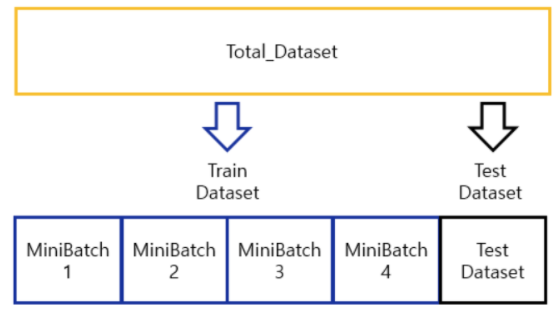

**미니배치 관련 세팅**        
* mb_size = 미니배치 하나에 들어가는 데이터 개수     
* train_ratio = 학습데이터 비율      
* MiniBatch_step_count = 미니배치 개수   
* test_begin_index = 학습데이터가 끝나는 지점, 테스트데이터가 시작하는 지점의 인덱스

In [9]:
mb_size = 2
train_ratio = 0.8

MiniBatch_step_count = (data.shape[0] * train_ratio) // mb_size
print('MiniBatch_step_count: ', MiniBatch_step_count) 

test_begin_index = MiniBatch_step_count * mb_size
print('test_begin_index: ', test_begin_index)

MiniBatch_step_count:  4.0
test_begin_index:  8.0


**인덱스 랜덤 셔플**

In [12]:
shuffle_map = np.arange(data.shape[0])
print("Original shuffle_map : ", shuffle_map)
np.random.shuffle(shuffle_map)
print("Now shuffle_map :      ", shuffle_map)

Original shuffle_map :  [0 1 2 3 4 5 6 7 8 9]
Now shuffle_map :       [9 3 1 8 7 4 0 6 5 2]


**랜덤 셔플된 인덱스를 활용해 학습 데이터, 테스트 데이터 분류 = 미니배치 처리**

In [13]:
#학습 데이터
mb_data_1 = data[shuffle_map[0:2]]
mb_data_2 = data[shuffle_map[2:4]]
mb_data_3 = data[shuffle_map[4:6]]
mb_data_4 = data[shuffle_map[6:8]]

#테스트 데이터
#data[shuffle_mape[8:10]]

In [14]:
print("mb_data_1 \n",mb_data_1)
print("mb_data_2 \n",mb_data_2)
print("mb_data_3 \n",mb_data_3)
print("mb_data_4 \n",mb_data_4)

mb_data_1 
 [[4.80000e+01 3.77537e+05 3.98500e+03 4.00000e+01 0.00000e+00 0.00000e+00
  1.00000e+00]
 [1.90000e+02 2.10936e+05 1.32000e+02 1.50000e+02 1.00000e+00 0.00000e+00
  0.00000e+00]]
mb_data_2 
 [[1.08400e+03 1.85575e+05 1.08000e+02 4.00000e+01 0.00000e+00 0.00000e+00
  1.00000e+00]
 [4.30000e+01 3.66881e+05 4.04800e+03 4.00000e+01 0.00000e+00 0.00000e+00
  1.00000e+00]]
mb_data_3 
 [[3.97000e+02 6.04478e+05 4.44000e+02 7.00000e+01 0.00000e+00 1.00000e+00
  0.00000e+00]
 [3.30000e+02 4.29227e+05 2.64000e+02 1.50000e+02 1.00000e+00 0.00000e+00
  0.00000e+00]]
mb_data_4 
 [[4.20000e+01 2.70900e+05 2.67000e+02 8.00000e+01 1.00000e+00 0.00000e+00
  0.00000e+00]
 [5.10000e+01 5.85861e+05 1.39000e+02 7.00000e+01 0.00000e+00 1.00000e+00
  0.00000e+00]]


**미니배치마다 독립변수, 종속변수 분리**

In [15]:
mb_1_train_x = mb_data_1[:, :-output_cnt] #[:, :-3]
mb_1_train_y = mb_data_1[:, -output_cnt:] #[:, -3:]

mb_2_train_x = mb_data_1[:, :-output_cnt]
mb_2_train_y = mb_data_1[:, -output_cnt:]

mb_3_train_x = mb_data_1[:, :-output_cnt] 
mb_3_train_y = mb_data_1[:, -output_cnt:]

mb_4_train_x = mb_data_1[:, :-output_cnt]
mb_4_train_y = mb_data_1[:, -output_cnt:]

In [16]:
print("====첫 번째 미니배치의 독립과 종속변수 입니다.====")
print('mb_1_train_x: \n', mb_1_train_x)
print('mb_1_train_y: \n', mb_1_train_y)

print("\n====두 번째 미니배치의 독립과 종속변수 입니다.====")
print('mb_2_train_x: \n', mb_2_train_x)
print('mb_2_train_y: \n', mb_2_train_y)

print("\n====세 번째 미니배치의 독립과 종속변수 입니다.====")
print('mb_3_train_x: \n', mb_3_train_x)
print('mb_3_train_y: \n', mb_3_train_y)

print("\n====네 번째 미니배치의 독립과 종속변수 입니다.====")
print('mb_4_train_x: \n', mb_4_train_x)
print('mb_4_train_y: \n', mb_4_train_y)

====첫 번째 미니배치의 독립과 종속변수 입니다.====
mb_1_train_x: 
 [[4.80000e+01 3.77537e+05 3.98500e+03 4.00000e+01]
 [1.90000e+02 2.10936e+05 1.32000e+02 1.50000e+02]]
mb_1_train_y: 
 [[0. 0. 1.]
 [1. 0. 0.]]

====두 번째 미니배치의 독립과 종속변수 입니다.====
mb_2_train_x: 
 [[4.80000e+01 3.77537e+05 3.98500e+03 4.00000e+01]
 [1.90000e+02 2.10936e+05 1.32000e+02 1.50000e+02]]
mb_2_train_y: 
 [[0. 0. 1.]
 [1. 0. 0.]]

====세 번째 미니배치의 독립과 종속변수 입니다.====
mb_3_train_x: 
 [[4.80000e+01 3.77537e+05 3.98500e+03 4.00000e+01]
 [1.90000e+02 2.10936e+05 1.32000e+02 1.50000e+02]]
mb_3_train_y: 
 [[0. 0. 1.]
 [1. 0. 0.]]

====네 번째 미니배치의 독립과 종속변수 입니다.====
mb_4_train_x: 
 [[4.80000e+01 3.77537e+05 3.98500e+03 4.00000e+01]
 [1.90000e+02 2.10936e+05 1.32000e+02 1.50000e+02]]
mb_4_train_y: 
 [[0. 0. 1.]
 [1. 0. 0.]]


**미니배치마다 퍼셉트론 값**

In [17]:
mb_1_y_hat_1 = np.matmul(mb_1_train_x, weight[:,0]) + bias[0]
mb_1_y_hat_2 = np.matmul(mb_1_train_x, weight[:,1]) + bias[1]
mb_1_y_hat_3 = np.matmul(mb_1_train_x, weight[:,2]) + bias[2]

mb_2_y_hat_1 = np.matmul(mb_2_train_x, weight[:,0]) + bias[0]
mb_2_y_hat_2 = np.matmul(mb_2_train_x, weight[:,1]) + bias[1]
mb_2_y_hat_3 = np.matmul(mb_2_train_x, weight[:,2]) + bias[2]

mb_3_y_hat_1 = np.matmul(mb_3_train_x, weight[:,0]) + bias[0]
mb_3_y_hat_2 = np.matmul(mb_3_train_x, weight[:,1]) + bias[1]
mb_3_y_hat_3 = np.matmul(mb_3_train_x, weight[:,2]) + bias[2]

mb_4_y_hat_1 = np.matmul(mb_4_train_x, weight[:,0]) + bias[0]
mb_4_y_hat_2 = np.matmul(mb_4_train_x, weight[:,1]) + bias[1]
mb_4_y_hat_3 = np.matmul(mb_4_train_x, weight[:,2]) + bias[2]

In [19]:
print('====첫 번째 미니배치의 퍼셉트론 값(P_1, P_2, P_3)====')
print('mb_1_y_hat_1: \n', mb_1_y_hat_1)
print('mb_1_y_hat_2: \n', mb_1_y_hat_2)
print('mb_1_y_hat_3: \n', mb_1_y_hat_3)

print('\n====두 번째 미니배치의 퍼셉트론 값(P_1, P_2, P_3)====')
print('mb_2_y_hat_1: \n', mb_2_y_hat_1)
print('mb_2_y_hat_2: \n', mb_2_y_hat_2)
print('mb_2_y_hat_3: \n', mb_2_y_hat_3)

print('\n====세 번째 미니배치의 퍼셉트론 값(P_1, P_2, P_3)====')
print('mb_3_y_hat_1: \n', mb_3_y_hat_1)
print('mb_3_y_hat_2: \n', mb_3_y_hat_2)
print('mb_3_y_hat_3: \n', mb_3_y_hat_3)

print('\n====네 번째 미니배치의 퍼셉트론 값(P_1, P_2, P_3)====')
print('mb_4_y_hat_1: \n', mb_4_y_hat_1)
print('mb_4_y_hat_2: \n', mb_4_y_hat_2)
print('mb_4_y_hat_3: \n', mb_4_y_hat_3)

====첫 번째 미니배치의 퍼셉트론 값(P_1, P_2, P_3)====
mb_1_y_hat_1: 
 [80537.00106555 43025.83017851]
mb_1_y_hat_2: 
 [-73153.16069638 -37319.28331709]
mb_1_y_hat_3: 
 [-43593.63887446 -25850.84993804]

====두 번째 미니배치의 퍼셉트론 값(P_1, P_2, P_3)====
mb_2_y_hat_1: 
 [80537.00106555 43025.83017851]
mb_2_y_hat_2: 
 [-73153.16069638 -37319.28331709]
mb_2_y_hat_3: 
 [-43593.63887446 -25850.84993804]

====세 번째 미니배치의 퍼셉트론 값(P_1, P_2, P_3)====
mb_3_y_hat_1: 
 [80537.00106555 43025.83017851]
mb_3_y_hat_2: 
 [-73153.16069638 -37319.28331709]
mb_3_y_hat_3: 
 [-43593.63887446 -25850.84993804]

====네 번째 미니배치의 퍼셉트론 값(P_1, P_2, P_3)====
mb_4_y_hat_1: 
 [80537.00106555 43025.83017851]
mb_4_y_hat_2: 
 [-73153.16069638 -37319.28331709]
mb_4_y_hat_3: 
 [-43593.63887446 -25850.84993804]


**각각의 미니배치 데이터들을 하나로 통합**      
* np.vstack : 배열을 세로로 결합

In [21]:
mb_data_total = np.vstack((mb_data_1,mb_data_2,mb_data_3,mb_data_4))
mb_data_total.shape

(8, 7)

**통합데이터 독립변수와 종속변수로 분리**

In [22]:
mb_data_total_x = mb_data_total[:, :-3]
mb_data_total_y = mb_data_total[:, -3:]

In [24]:
print(mb_data_total_x.shape)
print(mb_data_total_y.shape)

(8, 4)
(8, 3)


In [23]:
display(pd.DataFrame(mb_data_total_x))
display(pd.DataFrame(mb_data_total_y))

,0,1,2,3
0,48.0,377537.0,3985.0,40.0
1,190.0,210936.0,132.0,150.0
2,1084.0,185575.0,108.0,40.0
3,43.0,366881.0,4048.0,40.0
4,397.0,604478.0,444.0,70.0
5,330.0,429227.0,264.0,150.0
6,42.0,270900.0,267.0,80.0
7,51.0,585861.0,139.0,70.0


,0,1,2
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,0.0,1.0,0.0


**예측값 확인**

In [26]:
mb_total_y_hat = np.matmul(mb_data_total_x, weight) + bias
print(mb_total_y_hat)

[[  80537.00106555  -73153.16069638  -43593.63887446]
 [  43025.83017851  -37319.28331709  -25850.84993804]
 [  38405.90763529  -31760.88181482  -22680.31547248]
 [  78413.58780598  -71362.453604    -42257.64704724]
 [ 123895.47393784 -107568.0723514   -73456.2996982 ]
 [  87783.8892608   -76148.716431    -52354.16347683]
 [  55441.4564545   -48436.39938294  -32944.42788379]
 [ 119673.55296139 -104220.882631    -71346.8154321 ]]


**미니배치로 쪼개서 한 것과 같은 결과, 다른 형태**

In [27]:
print(mb_1_y_hat_1, mb_1_y_hat_2, mb_1_y_hat_3)
print(mb_2_y_hat_1, mb_2_y_hat_2, mb_2_y_hat_3)
print(mb_3_y_hat_1, mb_3_y_hat_2, mb_3_y_hat_3)
print(mb_4_y_hat_1, mb_4_y_hat_2, mb_4_y_hat_3)

[80537.00106555 43025.83017851] [-73153.16069638 -37319.28331709] [-43593.63887446 -25850.84993804]
[80537.00106555 43025.83017851] [-73153.16069638 -37319.28331709] [-43593.63887446 -25850.84993804]
[80537.00106555 43025.83017851] [-73153.16069638 -37319.28331709] [-43593.63887446 -25850.84993804]
[80537.00106555 43025.83017851] [-73153.16069638 -37319.28331709] [-43593.63887446 -25850.84993804]
